In [58]:
# Relationship bw mpg and other attributes
# Import necessary package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [59]:
df = pd.read_csv('titanic-training-data_mypractice.csv')

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
# embarked means where he is boarding to titanic

In [62]:
df.shape

(891, 12)

In [63]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

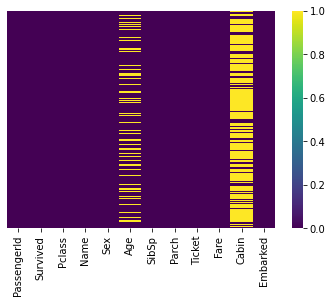

In [68]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:>

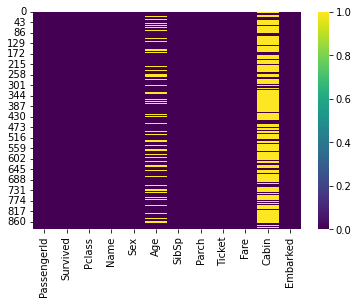

In [69]:
sns.heatmap(df.isnull(),cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

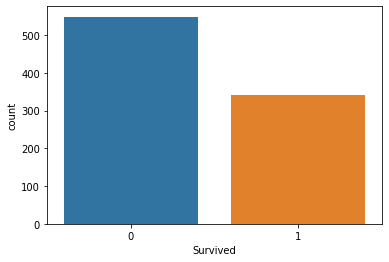

In [70]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

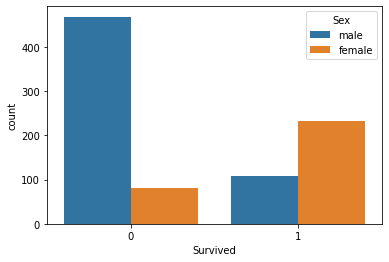

In [71]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

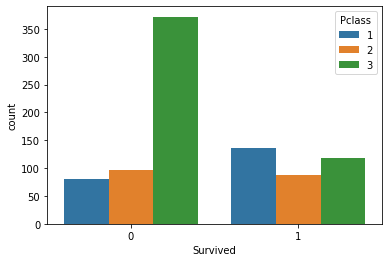

In [72]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

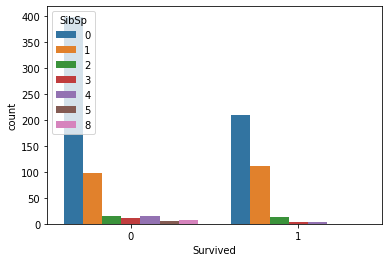

In [73]:
sns.countplot(x='Survived',hue='SibSp',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

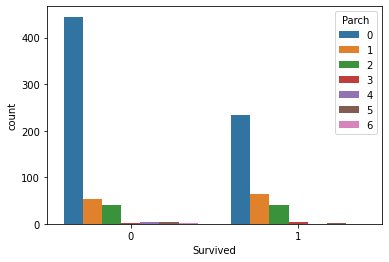

In [74]:
sns.countplot(x='Survived',hue='Parch',data=df)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

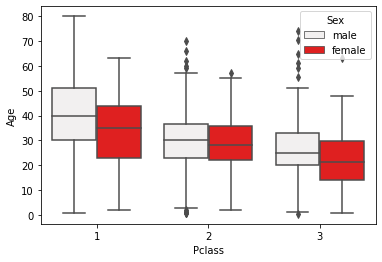

In [75]:
sns.boxplot(x= 'Pclass',y='Age',hue='Sex',color='Red',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

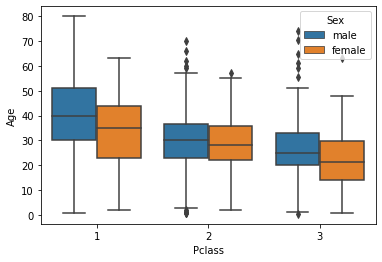

In [76]:
sns.boxplot(y='Age',x= 'Pclass',hue='Sex',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

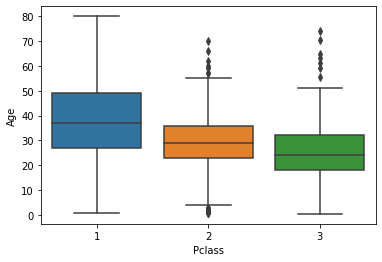

In [77]:
sns.boxplot(y='Age',x= 'Pclass',data=df)

In [78]:
df.drop('Cabin',axis=1,inplace = True)

In [79]:
df.dropna(inplace = True)
# in Age(177) and Embarked(2) m missing value h . so we decided to drop these rows.
# hence we drop all nan .
# so 891 - 179 = 712 rows bachi h.

In [80]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

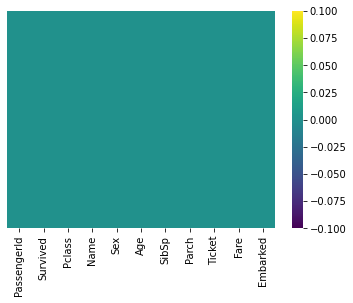

In [81]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 55.6+ KB


In [83]:
Sex = pd.get_dummies(df['Sex'])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [84]:
Sex = pd.get_dummies(df['Sex'],drop_first= True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [85]:
embarked1 = pd.get_dummies(df['Embarked'])

In [86]:
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [87]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [88]:
pclass =  pd.get_dummies(df['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [89]:
df.rename(columns = {'2':'pclass_2'}, inplace = True)

In [90]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


####  We can do one hot encoding to multiple columns in single code.


dummies = pd.get_dummies(df[['sex',"pclass","embarked"]],columns =['sex',"pclass","embarked"],prefix=
['male',"class1","embarked1"],drop_first= True).head()

In [91]:
df = pd.concat([df,Sex,embarked,pclass],axis=1)

In [92]:
df.rename(columns = {2:'pclass_2'}, inplace = True)

In [93]:
df.rename(columns = {3:'pclass_3'}, inplace = True)

In [94]:
df.drop(['Sex','PassengerId','Pclass','Name','Ticket','Fare','Embarked'],axis=1,inplace= True)

In [95]:
df

,Survived,Age,SibSp,Parch,male,Q,S,pclass_2,pclass_3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,0,1,0,0,1
886,0,27.0,0,0,1,0,1,1,0
887,1,19.0,0,0,0,0,1,0,0
889,1,26.0,0,0,1,0,0,0,0


In [96]:
x = df.drop('Survived',axis=1)
y= df['Survived']

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [98]:
x_train.head()

,Age,SibSp,Parch,male,Q,S,pclass_2,pclass_3
699,42.0,0,0,1,0,1,0,1
642,2.0,3,2,0,0,1,0,1
434,50.0,1,0,1,0,1,0,0
203,45.5,0,0,1,0,0,0,1
586,47.0,0,0,1,0,1,1,0


In [99]:
#lr_model = LogisticRegression()
#lr_model.fit(x_train,y_train)

In [100]:
lr_model = LogisticRegression(solver='newton-cg')
lr_model.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [101]:
predictions=lr_model.predict(x_test)

In [102]:
predictions

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [103]:
model_score = lr_model.score(x_train,y_train)

In [104]:
model_score

0.8092369477911646

In [105]:
model_score = lr_model.score(x_test,y_test)
model_score

0.7757009345794392

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7757009345794392

In [107]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))
# F1-score = (2*P*R/(P+R))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       126
           1       0.73      0.73      0.73        88

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214



In [108]:
metrics.accuracy_score(y_test,predictions)

0.7757009345794392

<AxesSubplot:>

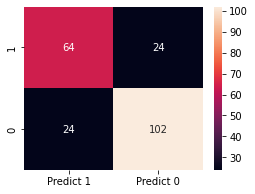

In [109]:
cm = metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm,annot=True,fmt='g')

<AxesSubplot:>

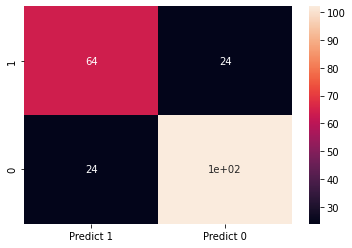

In [110]:
sns.heatmap(df_cm,annot=True)

In [111]:
# if we want to increase accuracy of model we can replace the missing value with median. and find the accuracy.

In [112]:
# KNN Method

In [113]:
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier

In [114]:
Xscaled = x.apply(zscore)
Xscaled.head()

,Age,SibSp,Parch,male,Q,S,pclass_2,pclass_3
0,-0.527669,0.522511,-0.506787,0.756138,-0.202326,0.534040,-0.566538,1.002813
1,0.577094,0.522511,-0.506787,-1.322511,-0.202326,-1.872519,-0.566538,-0.997195
2,-0.251478,-0.552714,-0.506787,-1.322511,-0.202326,0.534040,-0.566538,1.002813
3,0.369951,0.522511,-0.506787,-1.322511,-0.202326,0.534040,-0.566538,-0.997195
4,0.369951,-0.552714,-0.506787,0.756138,-0.202326,0.534040,-0.566538,1.002813


In [115]:
x_train,x_test,y_train,y_test=train_test_split(Xscaled,y,test_size=.3,random_state=40)

In [116]:
x_train.head()

,Age,SibSp,Parch,male,Q,S,pclass_2,pclass_3
675,-0.803859,-0.552714,-0.506787,0.756138,-0.202326,0.534040,-0.566538,1.002813
276,1.060427,-0.552714,-0.506787,-1.322511,-0.202326,0.534040,-0.566538,1.002813
190,0.162808,-0.552714,-0.506787,-1.322511,-0.202326,0.534040,1.765108,-0.997195
44,-0.734812,-0.552714,-0.506787,-1.322511,4.942527,-1.872519,-0.566538,1.002813
211,0.369951,-0.552714,-0.506787,-1.322511,-0.202326,0.534040,1.765108,-0.997195


In [117]:
NNH = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

In [118]:
NNH.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [119]:
predicted_labels= NNH.predict(x_test)
NNH.score(x_train,y_train)

0.8493975903614458

In [120]:
NNH.score(x_test,y_test)

0.7990654205607477

In [121]:
from sklearn import metrics

In [122]:
metrics.accuracy_score(y_test,predicted_labels)

0.7990654205607477

<AxesSubplot:>

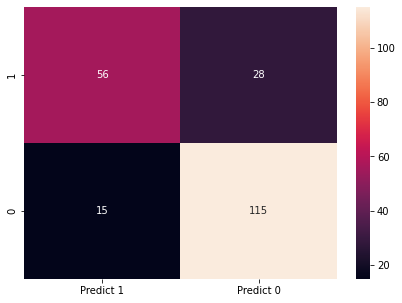

In [123]:
cm = metrics.confusion_matrix(y_test,predicted_labels,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [124]:
# This below SVM method is not correct bcz we use scaled data of x.

In [125]:
from sklearn import svm

In [126]:
clf =svm.SVC(gamma = .005 ,C = 3,kernel='poly')

In [127]:
clf.fit(x_train,y_train)

SVC(C=3, gamma=0.005, kernel='poly')

In [128]:
y_pred = clf.predict(x_test)

In [129]:
clf.score(x_test,y_test)

0.6074766355140186

In [130]:
# SVM method

In [131]:
x = df.drop('Survived',axis=1)
y= df['Survived']

In [132]:
x.head()

,Age,SibSp,Parch,male,Q,S,pclass_2,pclass_3
0,22.0,1,0,1,0,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,0,1,0,1
3,35.0,1,0,0,0,1,0,0
4,35.0,0,0,1,0,1,0,1


In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=40)

In [134]:
x_train.head(5)

,Age,SibSp,Parch,male,Q,S,pclass_2,pclass_3
675,18.0,0,0,1,0,1,0,1
276,45.0,0,0,0,0,1,0,1
190,32.0,0,0,0,0,1,1,0
44,19.0,0,0,0,1,0,0,1
211,35.0,0,0,0,0,1,1,0


In [135]:
clf.fit(x_train,y_train)

SVC(C=3, gamma=0.005, kernel='poly')

In [136]:
y_pred = clf.predict(x_test)

In [137]:
clf.score(x_train,y_train)

0.8052208835341366

In [138]:
clf.score(x_test,y_test)

0.7897196261682243

In [139]:
from sklearn.naive_bayes import GaussianNB
tit_model = GaussianNB()
tit_model.fit(x_train,y_train)

GaussianNB()

In [140]:
tit_model_predict = tit_model.predict(x_train)

In [141]:
tit_model.score(x_test,y_test)

0.7383177570093458

In [142]:
# Decision Tree

In [143]:
dTree = DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=3)
dTree.fit(x_train,y_train)

#The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. 
#The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).


DecisionTreeClassifier(max_depth=3, random_state=1)

In [144]:
print(dTree.score(x_train,y_train))
print(dTree.score(x_test,y_test))

0.8333333333333334
0.780373831775701


In [145]:
dTree = DecisionTreeClassifier(criterion="entropy",random_state=1,max_depth=3)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [146]:
print(dTree.score(x_train,y_train))
print(dTree.score(x_test,y_test))

0.8333333333333334
0.780373831775701


In [147]:
x_train.head()

,Age,SibSp,Parch,male,Q,S,pclass_2,pclass_3
675,18.0,0,0,1,0,1,0,1
276,45.0,0,0,0,0,1,0,1
190,32.0,0,0,0,0,1,1,0
44,19.0,0,0,0,1,0,0,1
211,35.0,0,0,0,0,1,1,0


In [148]:
dTree.predict([[2,3,2,0,0,1,0,1]])
# it will find the target value of row 642. result is 1 . means it survive.but actually it was not survive.
# our training score is .81.

C:\Users\CG-DTE\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [149]:
y_train.head()

675    0
276    0
190    1
44     1
211    1
Name: Survived, dtype: int64

In [150]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')

from sklearn import tree
from os import system

dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))


system command returning error: 1


In [151]:
# For Titanic , Both gives approx same result.

In [152]:
# Bagging

In [153]:
from sklearn.ensemble import BaggingClassifier

In [154]:
bgcl = BaggingClassifier(n_estimators=50,base_estimator=dTree,random_state=1)
bgcl = bgcl.fit(x_train,y_train)
# n_estimators means how many decision tree i m going to grow.
# dTree this is specified in above decision tree. It take that model and make trees in Bagging.
# In dTree we specified max_deapth = 3.Hence all trees in Bagging will grow upto 3.

In [155]:
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

0.8333333333333334
0.7897196261682243


In [156]:
predicted_labels = bgcl.predict(x_test)

<AxesSubplot:>

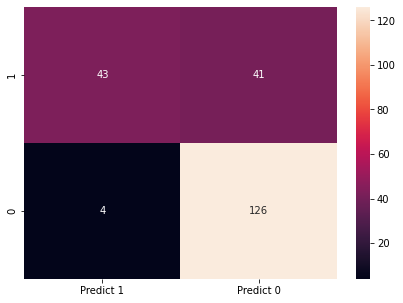

In [157]:
cm = metrics.confusion_matrix(y_test,predicted_labels,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [158]:
bgcl = BaggingClassifier(n_estimators=70,base_estimator=dTree,random_state=1)
bgcl = bgcl.fit(x_train,y_train)


In [159]:
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

0.8333333333333334
0.7897196261682243


In [160]:
# Boosting Techniques

In [161]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=25, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.7757009345794392
0.8273092369477911


<AxesSubplot:>

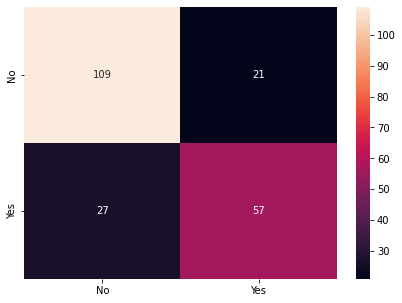

In [162]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))
print(abcl.score(x_train , y_train))

from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [163]:
from sklearn.ensemble import GradientBoostingClassifier
abcl =GradientBoostingClassifier(n_estimators=30, random_state=1)
abcl = abcl.fit(x_train, y_train)

0.794392523364486
0.8534136546184738


<AxesSubplot:>

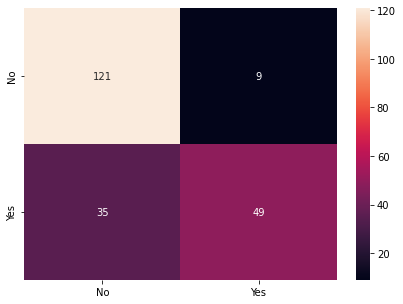

In [164]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))
print(abcl.score(x_train , y_train))

from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [165]:
# Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators =60, random_state=1,max_features=4)
rfcl = rfcl.fit(x_train, y_train)
# Random Forest there is no Pruning. Hence here we will not use max_depth.
# Here we use max_features i.e. no of columns used for spliting each node.


0.9578313253012049
0.7616822429906542


<AxesSubplot:>

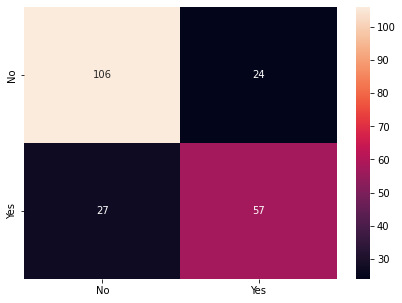

In [167]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_train, y_train))
print(rfcl.score(x_test, y_test))

from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
